<a href="https://colab.research.google.com/github/siva-Parvathi-M/Online_retail_data-ML-Predictive-Analysis/blob/main/Online_retail_data_ML_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset**

In [1]:
# Load the dataset
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/Source Data/synthetic_online_retail_data.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


**Understand the Data (EDA - Exploratory Data Analysis)**

In [2]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [3]:
# Descriptive statistics
df.describe()

,customer_id,product_id,category_id,quantity,price,review_score,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,799.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.239469,16.569992
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.000000,32.000000
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000


In [4]:
# Check for missing values
df.isnull().sum()

,0
customer_id,0
order_date,0
product_id,0
category_id,0
category_name,0
product_name,0
quantity,0
price,0
payment_method,0
city,0


In [5]:
# Unique values in each column
df.nunique()


,0
customer_id,1000
order_date,342
product_id,605
category_id,5
category_name,5
product_name,25
quantity,5
price,991
payment_method,3
city,962


**Visualizations**

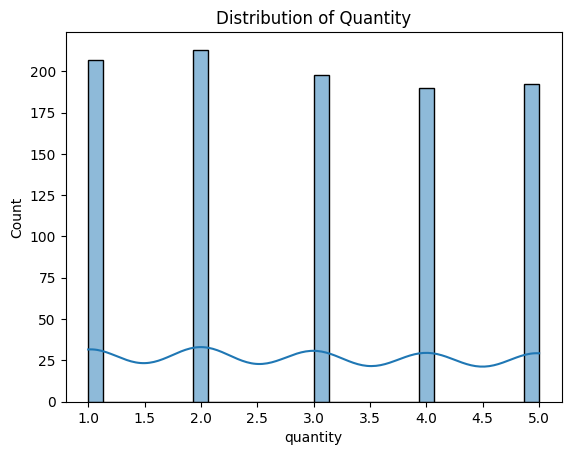

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Quantity or Price
sns.histplot(df['quantity'], bins=30, kde=True)
plt.title("Distribution of Quantity")
plt.show()

**Data Cleaning**

In [8]:
# Example: Remove rows with missing values
df_cleaned = df.dropna()

In [10]:
# Remove negative or zero quantities
df_cleaned = df_cleaned[df_cleaned['quantity'] > 0]

In [17]:
# Step 2: Clean column names and convert order_date to datetime
df.columns = df.columns.str.strip()  # remove extra spaces
df['order_date'] = pd.to_datetime(df['order_date'])

# Show the data types to confirm
print(df.dtypes)

customer_id                int64
order_date        datetime64[ns]
product_id                 int64
category_id                int64
category_name             object
product_name              object
quantity                   int64
price                    float64
payment_method            object
city                      object
review_score             float64
gender                    object
age                        int64
dtype: object


**Feature Engineering**

In [21]:
# Force datetime conversion and report issues
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'], errors='coerce')

# Show any rows where conversion failed
print("❗ Rows with invalid dates:")
print(df_cleaned[df_cleaned['order_date'].isnull()])

# Drop rows with invalid dates (if any)
df_cleaned = df_cleaned.dropna(subset=['order_date'])

# Confirm data type
print(df_cleaned.dtypes['order_date'])

❗ Rows with invalid dates:
Empty DataFrame
Columns: [customer_id, order_date, product_id, category_id, category_name, product_name, quantity, price, payment_method, city, review_score, gender, age]
Index: []
datetime64[ns]


<ipython-input-21-2ada5071bcf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'], errors='coerce')


In [22]:
# Now extract date parts
df_cleaned['order_month'] = df_cleaned['order_date'].dt.month
df_cleaned['order_day'] = df_cleaned['order_date'].dt.day
df_cleaned['order_weekday'] = df_cleaned['order_date'].dt.weekday

# Create total amount
df_cleaned['total_amount'] = df_cleaned['quantity'] * df_cleaned['price']

# Preview
df_cleaned[['order_date', 'order_month', 'order_day', 'order_weekday', 'total_amount']].head()

,order_date,order_month,order_day,order_weekday,total_amount
0,2024-12-17,12,17,1,746.72
2,2025-02-04,2,4,1,115.00
3,2024-10-28,10,28,0,460.22
4,2024-05-10,5,10,4,706.88
5,2024-12-03,12,3,1,784.64


from matplotlib import pyplot as plt
_df_0['order_month'].plot(kind='hist', bins=20, title='order_month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['order_day'].plot(kind='hist', bins=20, title='order_day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['order_weekday'].plot(kind='hist', bins=20, title='order_weekday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total_amount'].plot(kind='hist', bins=20, title='total_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='order_month', y='order_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='order_day', y='order_weekday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='order_weekday', y='total_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['order_month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('order_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('order_month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['order_day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('order_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('order_day')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['order_weekday']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('order_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('order_weekday')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_date']
  ys = series['total_amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('order_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_date')
_ = plt.ylabel('total_amount')

from matplotlib import pyplot as plt
_df_11['order_month'].plot(kind='line', figsize=(8, 4), title='order_month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['order_day'].plot(kind='line', figsize=(8, 4), title='order_day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['order_weekday'].plot(kind='line', figsize=(8, 4), title='order_weekday')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['total_amount'].plot(kind='line', figsize=(8, 4), title='total_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

**Define Features and Target for ML**

In [23]:
# Target column
target = 'review_score'

# Features (excluding customer_id, product_id, product_name which aren't useful here)
features = [
    'quantity', 'price', 'total_amount', 'order_month', 'order_weekday',
    'age', 'category_id'
]

# Prepare input and output
X = df_cleaned[features]
y = df_cleaned[target]

# Show shape
print("✅ Features shape:", X.shape)
print("🎯 Target shape:", y.shape)


✅ Features shape: (721, 7)
🎯 Target shape: (721,)


**Train/Test Split**

In [24]:
# Step 6: Split the data
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show shapes of the split data
print("📦 X_train:", X_train.shape)
print("🧪 X_test:", X_test.shape)
print("🎯 y_train:", y_train.shape)
print("🧾 y_test:", y_test.shape)

📦 X_train: (576, 7)
🧪 X_test: (145, 7)
🎯 y_train: (576,)
🧾 y_test: (145,)


**Model Training (RandomForest)**

In [25]:
# Step 7: Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Training complete
print("✅ Random Forest model training complete.")

✅ Random Forest model training complete.


**Model Evaluation**

In [26]:
# Step 8: Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print("📊 Model Evaluation Metrics:")
print(f"🔹 R² Score       : {r2:.3f}")
print(f"🔹 MAE (Error)    : {mae:.3f}")
print(f"🔹 MSE            : {mse:.3f}")
print(f"🔹 RMSE           : {rmse:.3f}")

📊 Model Evaluation Metrics:
🔹 R² Score       : -0.162
🔹 MAE (Error)    : 1.143
🔹 MSE            : 2.030
🔹 RMSE           : 1.425


# **Visualization of Predictions vs Actuals**

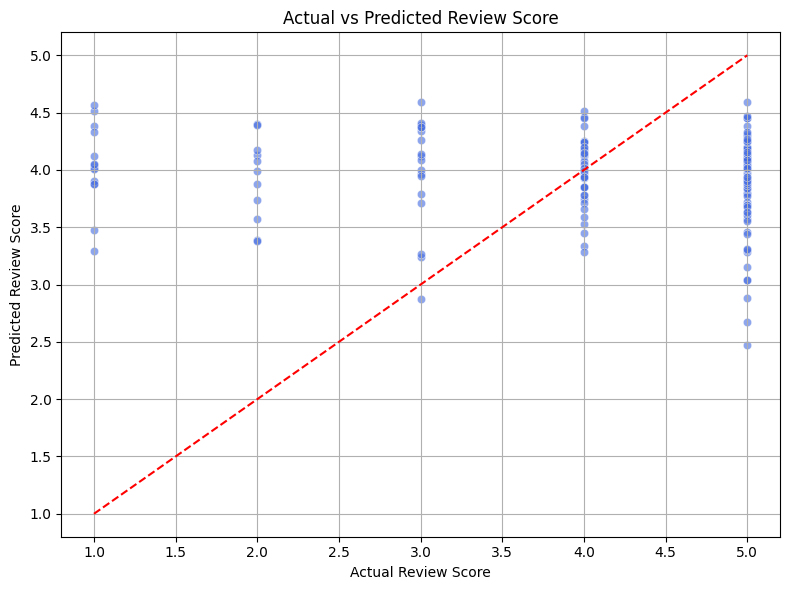

In [27]:
# Step 9: Visualize Predictions vs Actuals
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # reference line

plt.title('Actual vs Predicted Review Score')
plt.xlabel('Actual Review Score')
plt.ylabel('Predicted Review Score')
plt.grid(True)
plt.tight_layout()
plt.show()